# Introduction


**What?** Regression with Neural Networks in PyTorch



# Import modules

In [4]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np

# NNs as an universal approximator


- Neural networks are sometimes described as a **universal function approximator**. 
- We'll show this via two examples.



# Example #1 - approximating a quadratic function

In [25]:
torch.manual_seed(1)

# x data (tensor), shape=(100, 1)
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  
# noisy y data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [27]:
print(type(x))
# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
print(type(x))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [28]:
# This is one way to define a network, but other are available
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [36]:
# Initialise the model
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [31]:
# Train the network
for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    # Clear gradients for next train
    optimizer.zero_grad()   
    # Backpropagation, compute gradients
    loss.backward()         
    # Apply gradients
    optimizer.step()        

In [34]:
print("Final loss", loss.data.numpy())
print("Total number of iterations: ", t + 1)

Final loss 0.0050118268
Total number of iterations:  200


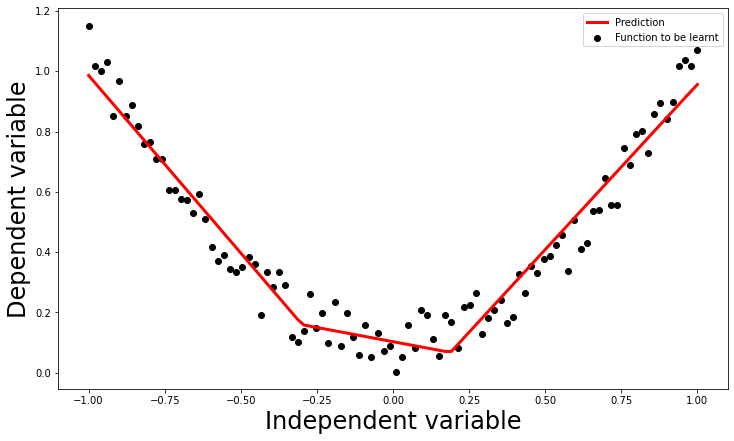

In [35]:
# Plot the results
fig, ax = plt.subplots(figsize=(12,7))
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)

ax.scatter(x.data.numpy(), y.data.numpy(), color = "k", label = "Function to be learnt")
ax.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw = 3, label = "Prediction")
plt.legend()
plt.show()


# Example #2 - approximating a sine waves

In [20]:
torch.manual_seed(1)    # reproducible

# x data (tensor), shape=(100, 1)
x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  
# noisy y data (tensor), shape=(100, 1)
y = torch.sin(x) + 0.2*torch.rand(x.size())

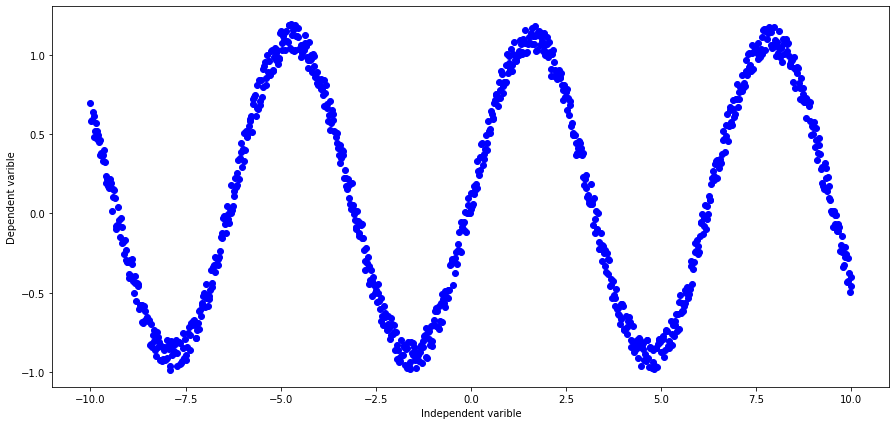

In [21]:
# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
plt.figure(figsize=(15,7))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [22]:
# This is another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

In [23]:
# Start training
for epoch in range(EPOCH):
    print("Current epoch", epoch)
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        # Input x and predict based on x
        prediction = net(b_x)    
        # Must be (1. nn output, 2. target)
        loss = loss_func(prediction, b_y)     

        # Clear gradients for next train
        optimizer.zero_grad()   
        # Backpropagation, compute gradients
        loss.backward()         
        # Apply gradients
        optimizer.step()        



Current epoch 0
Current epoch 1
Current epoch 2
Current epoch 3
Current epoch 4
Current epoch 5
Current epoch 6
Current epoch 7
Current epoch 8
Current epoch 9
Current epoch 10
Current epoch 11
Current epoch 12
Current epoch 13
Current epoch 14
Current epoch 15
Current epoch 16
Current epoch 17
Current epoch 18
Current epoch 19
Current epoch 20
Current epoch 21
Current epoch 22
Current epoch 23
Current epoch 24
Current epoch 25
Current epoch 26
Current epoch 27
Current epoch 28
Current epoch 29
Current epoch 30
Current epoch 31
Current epoch 32
Current epoch 33
Current epoch 34
Current epoch 35
Current epoch 36
Current epoch 37
Current epoch 38
Current epoch 39
Current epoch 40
Current epoch 41
Current epoch 42
Current epoch 43
Current epoch 44
Current epoch 45
Current epoch 46
Current epoch 47
Current epoch 48
Current epoch 49
Current epoch 50
Current epoch 51
Current epoch 52
Current epoch 53
Current epoch 54
Current epoch 55
Current epoch 56
Current epoch 57
Current epoch 58
Current

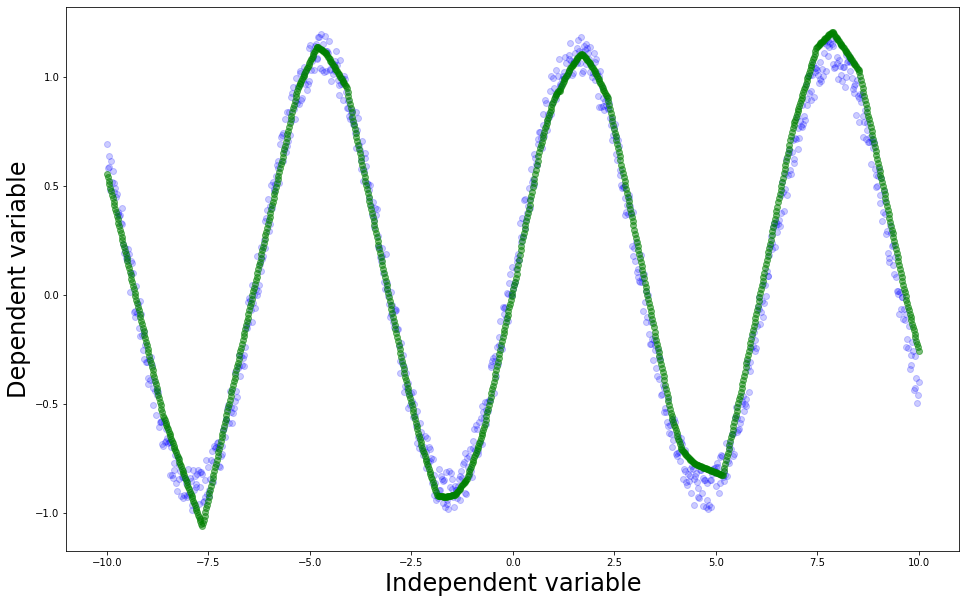

In [24]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.show()

# References


- https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379



# Conclusions


- NNs are power funciton estimators. The most stricking thing is that you can keep adding layers and it will eventually starts work. This by no means is an efficient process from a computational stand point but it saves man hours.
- PyTorch offers two ways to build a model.

